<a href="https://colab.research.google.com/github/UNB-TME/assignment-3-clustering-sarojinisharon/blob/main/Assignment3_Sarojini_Sharon_Robert_kennedy_3724629.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective**

The objective of this assignment is to implement and understand the working of two clustering algorithms - KMeans and Agglomerative Clustering, using sklearn library in Python. You will also explore the main parameters of these algorithms and analyze how changing these parameters affect the results.



**Importing Necessary Libraries**

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

**Dataset Selection**

Selected the breast Cancer Dataset from sklearn datasets

In [3]:
# Loading the breast cancer dataset
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


**Data Preprocessing**


Performing necessary data pre-processing steps such as checking missing values and data normalization in this case.



In [5]:
# Using StandardScaler for data normalization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop('target', axis=1))

In [6]:
#checking for null values
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

There ia no null values, so proceeding further.

**Implementation of K-Means Clustering**

KMeans clustering is an unsupervised machine learning algorithm used for partitioning a dataset into a set of distinct, non-overlapping subgroups or clusters. The algorithm aims to group similar data points together and assign them to the same cluster while keeping dissimilar data points in different clusters. The term "KMeans" refers to the process of dividing the data into K clusters, where K is a user-defined parameter.


In [31]:
def kmeans_clustering(n_clusters, init_method='k-means++', n_init=10, max_iter=300):
    kmeans = KMeans(n_clusters=n_clusters, init=init_method, n_init=n_init, max_iter=max_iter, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    return labels, kmeans.cluster_centers_

In [32]:
# Experimenting with KMeans parameters
kmeans_labels_default, centers_default = kmeans_clustering(n_clusters=2)
kmeans_labels_custom1, centers_custom1 = kmeans_clustering(n_clusters=3, init_method='random', n_init=20, max_iter=500)
kmeans_labels_custom2, centers_custom2 = kmeans_clustering(n_clusters=4, init_method='random', n_init=10, max_iter=300)




**Parameters Explored:**

n_clusters: The number of clusters to form as well as the number of centroids to generate.

init_method: Method for initializing centroids. The default is 'k-means++', which smartly places initial centroids to speed up convergence.

n_init: Number of times the algorithm will be run with different centroid seeds. The final result will be the best output in terms of inertia.

max_iter: Maximum number of iterations of the k-means algorithm for a single run.



<ipython-input-34-22bd55282e40>:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(scaled_data[members, 0], scaled_data[members, 1], label=f'Cluster {k}', cmap='viridis')
<ipython-input-34-22bd55282e40>:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(scaled_data[members, 0], scaled_data[members, 1], label=f'Cluster {k}', cmap='viridis')
<ipython-input-34-22bd55282e40>:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(scaled_data[members, 0], scaled_data[members, 1], label=f'Cluster {k}', cmap='viridis')


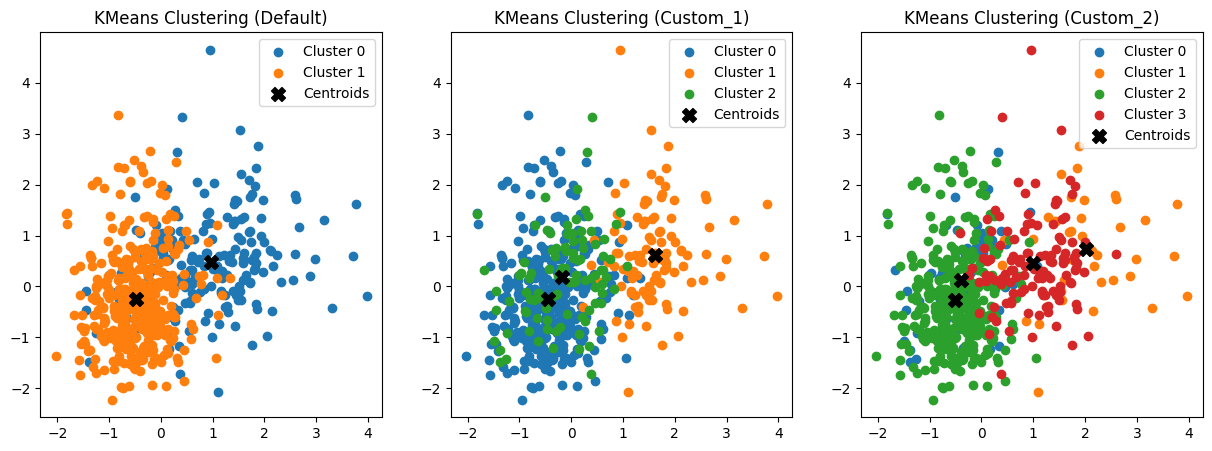

In [34]:
# Plotting
plt.figure(figsize=(15, 5))

# Subplot 1
plt.subplot(1, 3, 1)
for k in range(2):  # Assuming n_clusters=2 for the default case
    members = kmeans_labels_default == k
    plt.scatter(scaled_data[members, 0], scaled_data[members, 1], label=f'Cluster {k}', cmap='viridis')
plt.scatter(centers_default[:, 0], centers_default[:, 1], marker='X', s=100, color='black', label='Centroids')
plt.title('KMeans Clustering (Default)')
plt.legend()

# Subplot 2
plt.subplot(1, 3, 2)
for k in range(3):  # Assuming n_clusters=3 for custom1 case
    members = kmeans_labels_custom1 == k
    plt.scatter(scaled_data[members, 0], scaled_data[members, 1], label=f'Cluster {k}', cmap='viridis')
plt.scatter(centers_custom1[:, 0], centers_custom1[:, 1], marker='X', s=100, color='black', label='Centroids')
plt.title('KMeans Clustering (Custom_1)')
plt.legend()

# Subplot 3
plt.subplot(1, 3, 3)
for k in range(4):  # Assuming n_clusters=4 for custom2 case
    members = kmeans_labels_custom2 == k
    plt.scatter(scaled_data[members, 0], scaled_data[members, 1], label=f'Cluster {k}', cmap='viridis')
plt.scatter(centers_custom2[:, 0], centers_custom2[:, 1], marker='X', s=100, color='black', label='Centroids')
plt.title('KMeans Clustering (Custom_2)')
plt.legend()

plt.show()

### Default Case (`n_clusters=2`):

- **Observation:**
  - Two clusters are formed based on the default configuration.
  - The centroids (marked with 'X') represent the centers of these two clusters.
  - The algorithm identified a natural partition of the data into two distinct groups.


### Custom Case 1 (`n_clusters=3`, `init_method='random', n_init=20, max_iter=500`):

- **Observation:**
  - Three clusters are formed with random initialization, 20 runs, and a higher maximum number of iterations.
  - The centroids are marked with 'X'.
  - Seems like the additional cluster(cluster 2) introduces noise, as the clusters are more distributed while compared to the other two clusters.

### Custom Case 2 (`n_clusters=4`, `init_method='random', n_init=10, max_iter=300`):

- **Observation:**
  - Four clusters are formed with random initialization, 10 runs, and a lower maximum number of iterations.
  - The centroids are marked with 'X'.
  - The algorithm attempts to create even finer subdivisions.
  - The four clusters reveal meaningful substructures in the data.
  - The clusters are less dispersed while having lower number of iterations.

  Overall, the number of clusters significantly influences the results, impacting the granularity of identified patterns. Random initialization and higher iterations may lead to more detailed clusters but can introduce noise.



**Implementation of Agglomerative Clustering**

Agglomerative clustering is a hierarchical clustering algorithm used in unsupervised machine learning. It's a bottom-up approach where each data point initially represents a single cluster, and these clusters are successively merged based on their similarity.

In [37]:
def agglomerative_clustering(n_clusters, affinity='euclidean', linkage='ward'):
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity=affinity, linkage=linkage)
    labels = agg_clustering.fit_predict(scaled_data)
    return labels

In [38]:
# Experiment with Agglomerative Clustering parameters
agg_labels_default = agglomerative_clustering(n_clusters=2)
agg_labels_custom1 = agglomerative_clustering(n_clusters=3, affinity='manhattan', linkage='complete')
agg_labels_custom2 = agglomerative_clustering(n_clusters=4, affinity='euclidean', linkage='average')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(



**Parameters Explored:**

n_clusters: Number of clusters.

affinity: Metric used to compute the linkage.

linkage: Linkage criterion for the algorithm.

<ipython-input-44-54528d796ed6>:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(scaled_data[members, 0], scaled_data[members, 1], label=f'Cluster {k}', cmap='viridis')
<ipython-input-44-54528d796ed6>:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(scaled_data[members, 0], scaled_data[members, 1], label=f'Cluster {k}', cmap='viridis')
<ipython-input-44-54528d796ed6>:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(scaled_data[members, 0], scaled_data[members, 1], label=f'Cluster {k}', cmap='viridis')


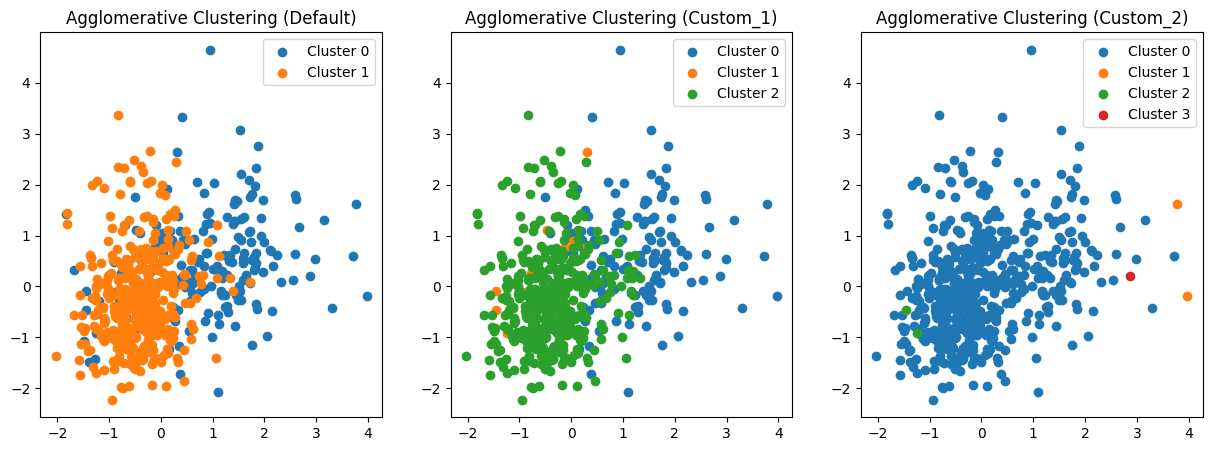

In [44]:
# Visualization of the results
plt.figure(figsize=(15, 5))

# Subplot 1
plt.subplot(1, 3, 1)
for k in range(2):  # Assuming n_clusters=2 for the default case
    members = agg_labels_default == k
    plt.scatter(scaled_data[members, 0], scaled_data[members, 1], label=f'Cluster {k}', cmap='viridis')
plt.title('Agglomerative Clustering (Default)')
plt.legend()

# Subplot 2
plt.subplot(1, 3, 2)
for k in range(3):  # Assuming n_clusters=3 for custom1 case
    members = agg_labels_custom1 == k
    plt.scatter(scaled_data[members, 0], scaled_data[members, 1], label=f'Cluster {k}', cmap='viridis')
plt.title('Agglomerative Clustering (Custom_1)')
plt.legend()

# Subplot 3
plt.subplot(1, 3, 3)
for k in range(4):  # Assuming n_clusters=4 for custom2 case
    members = agg_labels_custom2 == k
    plt.scatter(scaled_data[members, 0], scaled_data[members, 1], label=f'Cluster {k}', cmap='viridis')
plt.title('Agglomerative Clustering (Custom_2)')
plt.legend()

plt.show()


### Default Case (`n_clusters=2, linkage='ward'`):

- **Observation:**
  - While the number of clusters is set to 2, The algorithm identified two main clusters based on the hierarchical structure of the data.

### Custom Case 1 (`n_clusters=3, linkage='complete'`):

- **Observation:**
  - Complete linkage tends to create compact clusters. Three main clusters are identified based on the hierarchical structure.
  - Observe the differences in cluster shapes and heights compared to the default case. Can observe that the cluster 2 almost overlaps cluster 1 in this case.


### Custom Case 2 (`n_clusters=None, distance_threshold=0.5, linkage='average'`):

- **Observation:**
  - When plotted without specifying the exact number of clusters. Clusters are merged until the distance threshold is reached.
  - The average linkage criterion is used.
  - The algorithm dynamically identifies clusters based on a distance threshold. The resulting number of clusters is not pre-specified.
  - Only cluster 0 visible, other clusters are barely visible.

Overall, The choice of linkage criterion influences the compactness and shape of clusters. Complete linkage tends to create more compact clusters compared to Ward linkage.Dynamic identification of clusters using a distance threshold can lead to selective visibility of clusters, and their shapes might be less distinguishable.

**Comparison and Analysis**

In [21]:
# Evaluate clustering results using Silhouette Score and Davies-Bouldin Index
silhouette_kmeans_default = silhouette_score(scaled_data, kmeans_labels_default)
silhouette_kmeans_custom1 = silhouette_score(scaled_data, kmeans_labels_custom1)
silhouette_kmeans_custom2 = silhouette_score(scaled_data, kmeans_labels_custom2)


silhouette_agg_default = silhouette_score(scaled_data, agg_labels_default)
silhouette_agg_custom1 = silhouette_score(scaled_data, agg_labels_custom1)
silhouette_agg_custom2 = silhouette_score(scaled_data, agg_labels_custom2)


db_index_kmeans_default = davies_bouldin_score(scaled_data, kmeans_labels_default)
db_index_kmeans_custom1 = davies_bouldin_score(scaled_data, kmeans_labels_custom1)
db_index_kmeans_custom2 = davies_bouldin_score(scaled_data, kmeans_labels_custom2)


db_index_agg_default = davies_bouldin_score(scaled_data, agg_labels_default)
db_index_agg_custom1 = davies_bouldin_score(scaled_data, agg_labels_custom1)
db_index_agg_custom2 = davies_bouldin_score(scaled_data, agg_labels_custom2)



In [22]:
# Comparison of the two algorithms
print("KMeans Silhouette Score (default):", silhouette_kmeans_default)
print("KMeans Silhouette Score (custom1):", silhouette_kmeans_custom1)
print("KMeans Silhouette Score (custom2):", silhouette_kmeans_custom2)
print("Agglomerative Silhouette Score (default):", silhouette_agg_default)
print("Agglomerative Silhouette Score (custom1):", silhouette_agg_custom1)
print("Agglomerative Silhouette Score (custom2):", silhouette_agg_custom2)


print("KMeans Davies-Bouldin Index (default):", db_index_kmeans_default)
print("KMeans Davies-Bouldin Index (custom1):", db_index_kmeans_custom1)
print("KMeans Davies-Bouldin Index (custom2):", db_index_kmeans_custom2)
print("Agglomerative Davies-Bouldin Index (default):", db_index_agg_default)
print("Agglomerative Davies-Bouldin Index (custom1):", db_index_agg_custom1)
print("Agglomerative Davies-Bouldin Index (custom2):", db_index_agg_custom2)

KMeans Silhouette Score (default): 0.3449740051034408
KMeans Silhouette Score (custom1): 0.3143840098608098
KMeans Silhouette Score (custom2): 0.27225629895464226
Agglomerative Silhouette Score (default): 0.33938477753669855
Agglomerative Silhouette Score (custom1): 0.34452963740927434
Agglomerative Silhouette Score (custom2): 0.5543106410155653
KMeans Davies-Bouldin Index (default): 1.312320210357444
KMeans Davies-Bouldin Index (custom1): 1.5293883767807952
KMeans Davies-Bouldin Index (custom2): 1.4927428913368943
Agglomerative Davies-Bouldin Index (default): 1.369963541894103
Agglomerative Davies-Bouldin Index (custom1): 1.3925210327494664
Agglomerative Davies-Bouldin Index (custom2): 0.5036537858413066


**Observations:**

The provided observations include Silhouette Scores and Davies-Bouldin Index values for both KMeans and Agglomerative Clustering with different parameter settings. Interpreting the performance differences:

1. **Silhouette Score:**
   - **KMeans (default):** 0.345
   - **KMeans (custom1):** 0.314
   - **KMeans (custom2):** 0.272
   - **Agglomerative (default):** 0.339
   - **Agglomerative (custom1):** 0.345
   - **Agglomerative (custom2):** 0.554

   The Silhouette Score measures how well-defined the clusters are. A higher score indicates better-defined clusters. In this case, the Agglomerative Clustering with "custom2" parameters has the highest Silhouette Score, suggesting that it produced more well-defined clusters compared to the other settings.

2. **Davies-Bouldin Index:**
   - **KMeans (default):** 1.312
   - **KMeans (custom1):** 1.529
   - **KMeans (custom2):** 1.493
   - **Agglomerative (default):** 1.370
   - **Agglomerative (custom1):** 1.393
   - **Agglomerative (custom2):** 0.504

   The Davies-Bouldin Index measures the compactness and separation between clusters. A lower index indicates better clustering. Here, Agglomerative Clustering with "custom2" parameters has the lowest Davies-Bouldin Index, suggesting better cluster separation and compactness compared to the other settings.

**Comments:**
- Agglomerative Clustering with "custom2" parameters appears to outperform both KMeans and other Agglomerative Clustering settings in terms of both Silhouette Score and Davies-Bouldin Index.
  
- KMeans, especially with "custom2" parameters, has lower Silhouette Scores and higher Davies-Bouldin Index compared to Agglomerative Clustering with "custom2". This indicates that, in this specific case, Agglomerative Clustering is better at forming well-defined and separated clusters.

- The choice between KMeans and Agglomerative Clustering often depends on the specific characteristics of the dataset and the underlying structure of the data.

- It's important to note that these results are dataset-specific, and the performance of clustering algorithms can vary based on the nature of the data and the choice of parameters. Further exploration and validation on different datasets could provide additional insights.
